In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
import mnist as MNIST

In [2]:
#opening data
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
# print("the first element of the dataset \n" , X_test[0])
# print("\n the first element of y is",Y_test[0])
# print(X_test.dtype)
# this tells us that there are 60,000 data and each is a 28 x 28 array
# since it is 28x28 the input shape would be 784
# we are gonna be normalizing the data so that it is more suitable for model training
tf.keras.utils.normalize(X_train,axis=1)
tf.keras.utils.normalize(X_test,axis=1)
print(X_train[0].shape)


(28, 28)


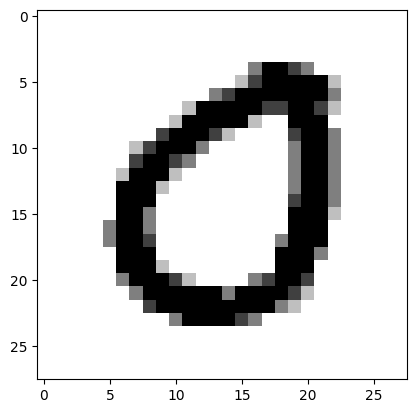

answer ->  0


In [3]:
# we will be viewing the data here using matplotlib
import random
def image(n):
    plt.imshow(n,cmap=plt.cm.binary)
    plt.show()
m = random.randint(0,60000)
image(X_train[m])
print("answer -> ",Y_train[m])

In [4]:
#training the nueral network in this 
model = Sequential(
    [
        Flatten(input_shape = (28,28)),
        Dense(units = 128,activation = 'relu'),
        Dense(units = 128,activation = 'relu'),
        Dense(units = 10,activation = 'linear')

    ],name = "Model_1"
    
)




In [5]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = 'Adam',
    metrics = ['accuracy']
    
)
model.fit(X_train,Y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 13s 6ms/step - loss: 1.6643 - accuracy: 0.8735
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3108 - accuracy: 0.9294
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2183 - accuracy: 0.9448
Epoch 4/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1686 - accuracy: 0.9545
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1413 - accuracy: 0.9603
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1287 - accuracy: 0.9639
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1187 - accuracy: 0.9668
Epoch 8/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1092 - accuracy: 0.9694
Epoch 9/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1017 - accuracy: 0.9714
Epoch 10/20
1875/1875 [==============================] - 12s 6ms/step - l

In [7]:
evaulation = model.evaluate(X_test,Y_test)
evaulation

313/313 [==============================] - 2s 5ms/step - loss: 0.1921 - accuracy: 0.9683


[0.19209036231040955, 0.9682999849319458]

313/313 [==============================] - 1s 4ms/step
label-> 4
prediction ->  4


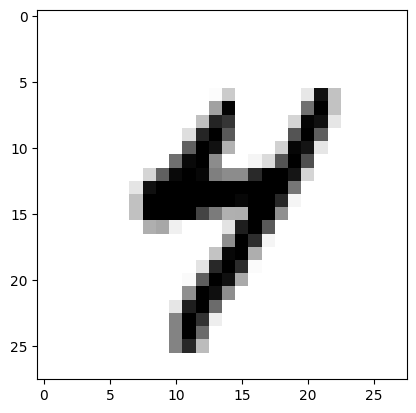

array([-114.13677 ,  -26.01808 ,  -29.637993,  -33.645622,   24.598886,
        -28.442347,  -42.107216,  -27.053856,  -40.805855,    1.012188],
      dtype=float32)

In [8]:
# making a prediction
m = random.randint(0,10000)
prediction = model.predict([X_test])
print('label->',Y_test[m])
print('prediction -> ',np.argmax(prediction[m]))

image(X_test[m])
prediction[m]

In [9]:
# saving the model
model.save("digit-recognizer.h5")
print("Model saved.")

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved.
